In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# Leitura de Arquivos

In [2]:
#Economic Freedom World
path_efw = "efw_cc.csv" 

path_bill = "2022_forbes_billionaires.csv"
path_happy = "Happy_2019.csv"
path_HDI = "Human Development Index.csv"
path_suicide = "Suicide_master.csv"

#Arquivos complementares de PIB e População
path_pop = "populationbycountry19802010millions.csv"
path_GDP = "GDP/gdp.csv"
path_GDP_growth = "GDP/gdp_growth.csv"

#Percepção de Corrupção
path_corr = "Corruption/history.csv"

#Melhores Paises para Startups
path_star = "Best Countries/Best Countries for Startups.csv"

#Expectativas de Vida
#path_life = "Life expectancy.csv"

#Gastos Militares em USD
path_militar = "Military Expenditure.csv"

#Unicornios
path_uni = "Unicorns.csv"

#Desemprego +15 Anos.
path_emp = "Employment_Total.csv"


In [3]:
data_efw = pd.read_csv(path_efw, sep=',')

data_bill = pd.read_csv(path_bill, sep=',')
data_happy = pd.read_csv(path_happy, sep=',')
data_HDI = pd.read_csv(path_HDI, sep=',')
data_suicide = pd.read_csv(path_suicide, sep=',')

data_pop = pd.read_csv(path_pop, sep=',', index_col = 0)
data_GDP = pd.read_csv(path_GDP, sep=',', index_col = 0)
data_GDP_growth = pd.read_csv(path_GDP_growth, sep=',', index_col = 0)

data_corr = pd.read_csv(path_corr, sep=',')
data_star = pd.read_csv(path_star, sep=',')
#data_life = pd.read_csv(path_life, sep=',')
data_militar = pd.read_csv(path_militar, sep=',')
#data_MW = pd.read_csv(path_MW, sep=',')

data_uni = pd.read_csv(path_uni, sep=',', encoding="utf-8")

data_emp = pd.read_csv(path_emp, sep=',')

# Primeira vizualização e tratamento dos datasets.

In [4]:
#data_bill.country.unique()
#set(data_efw.countries).difference(set(data_emp['Country Name']))
#set(data_emp['Country Name']).difference(set(data_efw.countries))

In [5]:
#Padronizando Nomes de Estudo
#data_efw['countries'] = data_efw['countries'].str.replace('Korea, South', 'South Korea')
data_efw.replace({'countries': {'Cape Verde': 'Cabo Verde',
                                'Korea, South': 'South Korea',
                                'Unit. Arab Em.': 'United Arab Emirates',
                                'Congo, Rep. Of': 'Congo',
                                'Congo, Dem. R.': 'Rep. Dem. Congo'}}, inplace=True)
####

data_bill.drop('Unnamed: 0', axis=1, inplace=True)
data_bill.set_index('rank')
data_bill['networth']=data_bill['networth'].str.replace('$','', regex=True)
data_bill['networth']=data_bill['networth'].str.replace(' B','', regex=True)
data_bill['networth']=data_bill['networth'].apply(pd.to_numeric)

data_bill.replace({'country': {'Eswatini (Swaziland)': 'Swaziland'}}, inplace=True)

####

data_HDI['Country'].astype(str)
data_HDI['Country'] = data_HDI['Country'].str.strip()
data_HDI.replace({'Country': {'Venezuela (Bolivarian Republic of)': 'Venezuela',
                              'Tanzania (United Republic of)': 'Tanzania',
                              'Hong Kong, China (SAR)': 'Hong Kong',
                              'Korea (Republic of)': 'South Korea',
                              'Russian Federation': 'Russia',
                              'Iran (Islamic Republic of)': 'Iran',
                              'Congo (Democratic Republic of the)': 'Rep. Dem. Congo',
                              'Bolivia (Plurinational State of)': 'Bolivia'}}, inplace=True)

####

data_suicide.replace({'country':    {'Czech Republic': 'Czech Rep.',
                                     'Dominica': 'Dominican Rep.',
                                     'Republic of Korea': 'South Korea',
                                     'Russian Federation': 'Russia',
                                     'Slovakia': 'Slovak Rep',
                                     'Trinidad and Tobago': 'Trinidad & Tob.'}}, inplace=True)

####

data_pop.rename(index={'Korea, North': 'North Korea',
                       'Bahamas, The': 'Bahamas',
                       'Brunei': 'Brunei Darussalam',
                       'Cape Verde': 'Cabo Verde',
                       'Central African Republic': 'Central Afr. Rep.',
                       'Czech Republic': 'Czech Rep.',
                       'Dominican Republic': 'Dominican Rep.',
                       'Papua New Guinea': 'Pap. New Guinea',
                       'Slovakia': 'Slovak Rep',
                       'Korea, South': 'South Korea',
                       'Timor-Leste (East Timor)':  'Timor-Leste',
                       'Trinidad and Tobago': 'Trinidad & Tob.',
                       'Yemen':  'Yemen, Rep.'},inplace=True)

####

data_GDP.rename(index={'Bahamas, The':'Bahamas',
                       'Central African Republic': 'Central Afr. Rep.',
                       'Czech Republic': 'Czech Rep.',
                       'Dominican Republic': 'Dominican Rep.',
                       'Egypt, Arab Rep.': 'Egypt',
                       'Hong Kong SAR, China': 'Hong Kong',
                       'Iran, Islamic Rep.': 'Iran',
                       'Lao PDR': 'Laos',
                       'North Macedonia': 'Macedonia',
                       'Papua New Guinea': 'Pap. New Guinea',
                       'Russian Federation': 'Russia',
                       'Slovak Republic': 'Slovak Rep',
                       'Korea, Rep.': 'South Korea',
                       'Syrian Arab Republic': 'Syria',
                       'Trinidad and Tobago': 'Trinidad & Tob.',
                       'Venezuela, RB': 'Venezuela'}, inplace=True)


####
data_GDP_growth.rename(index={'Bahamas, The':'Bahamas',
                       'Central African Republic': 'Central Afr. Rep.',
                       'Czech Republic': 'Czech Rep.',
                       'Dominican Republic': 'Dominican Rep.',
                       'Egypt, Arab Rep.': 'Egypt',
                       'Hong Kong SAR, China': 'Hong Kong',
                       'Iran, Islamic Rep.': 'Iran',
                       'Lao PDR': 'Laos',
                       'North Macedonia': 'Macedonia',
                       'Papua New Guinea': 'Pap. New Guinea',
                       'Russian Federation': 'Russia',
                       'Slovak Republic': 'Slovak Rep',
                       'Korea, Rep.': 'South Korea',
                       'Syrian Arab Republic': 'Syria',
                       'Trinidad and Tobago': 'Trinidad & Tob.',
                       'Venezuela, RB': 'Venezuela'}, inplace=True)
####
                       
data_corr.replace({'Country': {'Brunei': 'Brunei Darussalam',
                               'Cape Verde': 'Cabo Verde',
                               'Central African Republic': 'Central Afr. Rep.',
                               'Czech Republic': 'Czech Rep.',
                               'Dominican Republic': 'Dominican Rep.',
                               'Gambia': 'Gambia, The',
                               'Papua New Guinea': 'Pap. New Guinea',
                               'Slovakia': 'Slovak Rep',
                               'Korea (South)': 'South Korea',
                               'Trinidad and Tobago': 'Trinidad & Tob.',
                               'The United States of America': 'United States',
                               'Yemen': 'Yemen, Rep.'}}, inplace=True)
####

data_uni['Valuation(US$ billions)'] = data_uni['Valuation(US$ billions)'].str.replace('+','')
data_uni['Valuation(US$ billions)'] = data_uni['Valuation(US$ billions)'].astype(float)
data_uni['Country/countries'] = data_uni['Country/countries'].astype(str)
data_uni['Country/countries'] = data_uni['Country/countries'].apply(lambda x: str(x).replace(u'\xa0', u''))
data_uni.replace({'Country/countries': {'US': 'United States',
                             'US / Ireland': 'United States',
                             'UK': 'United Kingdom',
                             'UK / UAE': 'United Kingdom',
                             'Ukraine[39]/United States[40]': 'Ukraine',
                             'China / Hong Kong': 'China',
                             'Hong Kong / China': 'Hong Kong',
                             'Portugal / US': 'Portugal',
                             'US[67]': 'United States',
                             'India / US': 'India',
                             'Australia / Hong Kong': 'Australia',
                             'China / US': 'China',
                             'UK / US': 'United Kingdom',
                             'France / US': 'France',
                             'Israel / US': 'Israel',
                             'Brazil / US': 'Brazil',
                             'US / Israel': 'United States',
                             'Argentina / US': 'Argentina',
                             'Portugal / US [308]': 'Portugal',
                             'Senegal / US': 'Senegal',
                             'Israel /  US': 'Israel',
                             'Nigeria / US': 'Nigeria',
                             'US[362]': 'United States',
                             'USA': 'United States',
                             'Spain / US': 'Spain',
                             'Germany / Russia': 'Germany',
                             'Singapore / Israel': 'Singapore',
                             'US, UK and Europe': 'United States',
                             'Singapore / Switzerland': 'Singapore',
                             'UAE': 'United Arab Emirates',
                             'Canada / USA': 'Canada',
                             'India/ US': 'India',
                             'Croatia / UK': 'Croatia',
                             'India / Singapore': 'India',
                             'Armenia / US': 'Armenia',
                             'Estonia / US': 'Estonia'}}, inplace=True)
data_uni.columns = ['Company', 'Valuation(US$ billions)', 'Valuation date', 'Industry',
       'country', 'Founder(s)']

####

data_emp.replace({'Country Name': {'Bahamas, The': 'Bahamas',
                                   'Central African Republic': 'Central Afr. Rep.',
                                   'Congo, Rep.': 'Congo',
                                   'Czech Republic': 'Czech Rep.',
                                   'Dominican Republic': 'Dominican Rep.',
                                   'Egypt, Arab Rep.': 'Egypt',
                                   'Hong Kong SAR, China': 'Hong Kong',
                                   'Iran, Islamic Rep.': 'Iran',
                                   'Lao PDR': 'Laos',
                                   'North Macedonia': 'Macedonia',
                                   'Papua New Guinea': 'Pap. New Guinea',
                                   'Congo, Dem. Rep.': 'Rep. Dem. Congo',
                                   'Russian Federation': 'Russia',
                                   'Slovak Republic': 'Slovak Rep',
                                   'Korea, Rep.': 'South Korea',
                                   'Syrian Arab Republic': 'Syria',
                                   'Trinidad and Tobago': 'Trinidad & Tob.',
                                   'Turkiye': 'Turkey',
                                   'Venezuela, RB': 'Venezuela'}}, inplace=True)
data_emp.drop('Unnamed: 66', axis=1, inplace=True)

In [6]:
datas = [data_efw,
         data_bill, 
         data_happy, 
         data_HDI, 
         data_suicide, 
         data_pop, 
         data_GDP,
         data_corr, 
         data_star, 
         data_militar,
         data_GDP_growth,
         data_uni,
         data_emp]

In [7]:
#Escolha dos Países a Serem Analizados
countries = np.array(list(set(data_efw.countries).intersection(#set(data_bill.country), 
                                                               set(data_happy['Country or region']), 
                                                               set(data_HDI.Country), 
                                                               set(data_suicide.country), 
                                                               set(data_pop.index), 
                                                               set(data_GDP.index),
                                                               set(data_corr.Country), 
                                                               set(data_star.country), 
                                                               set(data_militar.Name),
                                                               set(data_GDP_growth.index))))

# Criação dos Dataframes de Estudo.

In [8]:
DF = []
DF_std2 = pd.DataFrame()

for x in range(len(countries)): 
    pais = countries[x]

    # Parcela A
    std = datas[0][datas[0]['countries'] == pais].sort_values(by='year')
    std = std.reset_index()
    a = std.drop(columns=['index','ISO_code']) #, inplace=True)

    # Parcela B e C
    b = datas[1][datas[1]['country'] == pais].groupby(['country']).name.count()
    c = datas[1][datas[1]['country'] == pais].groupby(['country']).networth.sum()

    # Parcela D
    d = datas[2][datas[2]['Country or region'] == pais]

    # Parcela E
    std = datas[3][datas[3]['Country'] == pais].iloc[:,2:].transpose()
    std = std.reset_index()
    std.columns = ['year', 'HDI']
    e = std
    e['year'] = e.year.astype(int)


    # Parcela F
    std = datas[4][datas[4]['country'] == pais]
    std = std.drop(columns=['country', 'sex', 'age', 'country-year', 'suicides/100k pop',
                            'population', 'gdp_per_capita ($)', 'generation'])#, inplace=True)

    #std.iloc[:,4].unique()

    std1 = std.iloc[:,:2].groupby(['year']).sum()
    f0 = std1.reset_index()

    f1 = pd.DataFrame(std.groupby(['year'])['HDI for year'].max())
    f2 = pd.DataFrame(std.groupby(['year'])[' gdp_for_year ($) '].max())
    ff = pd.concat([f1, f2], axis=1)
    ff = ff.reset_index()

    f = pd.concat([f0, ff], axis = 1)
    f.columns = ['year', 'suicides_no', 'year_2', 'HDI_2', 'GDP_2']

    f['GDP_2'] = f['GDP_2'].str.replace(',','')
    f['GDP_2'] = f.GDP_2.astype(float)
    f.drop(columns=['year_2'], inplace=True)

    # Parcela G

    std = pd.DataFrame(datas[5].loc[pais])
    std = std.reset_index()
    std.columns = ['year', 'Population']
    g = std
    g['year'] = g.year.astype(int)

    # Parcela H

    std = pd.DataFrame(datas[6].loc[pais][1:])
    std = std.reset_index()
    std.columns = ['year', 'GDP'] #PIB
    h = std.iloc[:-1]
    h['year'] = h.year.astype(int)
    h['GDP'] = h.GDP.astype(float)

    # Parcela I
    
    std = datas[7][datas[7]['Country'] == pais].iloc[:,4:]
    std.columns = ['2016', '2015', '2014', '2013', '2012']
    std = std.transpose()
    std = std.reset_index()
    std.columns = ['year', 'CPI']
    i = std
    i['year'] = i.year.astype(int)

    # Parcela J

    std = datas[8][datas[8]['country'] == pais].iloc[:,[0,3]].transpose()
    std.columns = ['Startups_Score_2020']
    j = std

    # Parcela K

    std = datas[9][datas[9]['Name'] == pais]
    std = std.iloc[:,4:].transpose()
    std = std.reset_index()
    std.columns = ['year', 'Military_Expenditure_USD']
    k = std
    k['year'] = k.year.astype(int)
    
    # Parcela L

    std = pd.DataFrame(datas[10].loc[pais][1:])
    std = std.reset_index()
    std.columns = ['year', 'GDP_growth'] #Crescimento do PIB
    l = std.iloc[:-1]
    l['year'] = l.year.astype(int)
    l['GDP_growth'] = l.GDP_growth.astype(float)
    
    # Parcela M e N
    
    m = datas[11][datas[11]['country'] == pais].groupby(['country']).Company.count()
    n = datas[11][datas[11]['country'] == pais].groupby(['country'])['Valuation(US$ billions)'].sum()
    
    # Parcela O
    
    o = datas[12][datas[12]['Country Name'] == pais].iloc[:,4:].transpose()
    o = o.reset_index()
    o.columns = ['year', 'Employment_up15_%']
    o['year'] = o.year.astype(int)

    # 0 3 4 5 6 9 10 12 - DF por pais
    # Letras - a e f g h k l o

    # 1 2 7 8 11 - DF todos os paises
    # Letras - b c d i j

    DF2 =  pd.merge(b, c, how = 'outer', on = 'country')
    DF2 =  pd.merge(DF2, m, how = 'outer', on = 'country')
    DF2 =  pd.merge(DF2, n, how = 'outer', on = 'country')
    DF2 = DF2.reset_index()
    d = d.rename(columns={'Country or region': 'country'})
    DF2 =  pd.merge(DF2, d, how = 'outer', on = 'country')
    DF2['Corru_Perc_Index'] = i.iloc[0,1]
    DF2['Startups_Ranking_2020'] = j.iloc[0,0]
    DF2['Startups_Score_2020'] = j.iloc[1,0]
    
    DF_std2 = pd.concat([DF_std2, DF2])
    
    ### Unindo os Dataframes em um Único.

    df_std = pd.merge(a, e, how = 'outer', on = 'year')
    df_std = pd.merge(df_std, f, how = 'outer', on = 'year')
    df_std = pd.merge(df_std, g, how = 'outer', on = 'year')
    df_std = pd.merge(df_std, h, how = 'outer', on = 'year')
    df_std = pd.merge(df_std, k, how = 'outer', on = 'year')
    df_std = pd.merge(df_std, l, how = 'outer', on = 'year')
    df_std = pd.merge(df_std, o, how = 'outer', on = 'year')
    df_std = df_std.sort_values(by='year').reset_index(drop=True)
    df_std['HDI_year'] = df_std.loc[:,['HDI','HDI_2']].max(skipna=True, axis=1)
    df_std['GDP_year'] = df_std.loc[:,['GDP','GDP_2']].max(skipna=True, axis=1)

    # Preenchendo os Valores da População Utilizando regressão linear.

    df_inter = df_std.interpolate(method='linear', limit_direction='both', axis=0)
    df = df_inter.loc[:,['year','Population']].dropna(how='any')
    df['Population'] = df['Population'].str.replace('--','0')
    
    X = pd.DataFrame(df.year)
    y = df.Population

    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 1)

    model = LinearRegression(fit_intercept = True)
    model.fit(Xtrain, ytrain)
    ypred = model.predict(pd.DataFrame(df_inter.year))

    df_inter['Population_year'] = ypred
 
    # Preenchendo NaN dos paíes
    values = {"countries": pais}
    df_inter = df_inter.fillna(value=values)
    
    # Removendo colunas utilizadas 

    df_inter.drop(columns=['HDI','HDI_2','GDP','GDP_2', 'Population'], inplace=True)

    DF.append(df_inter)

In [9]:
### Unindo todos os DF em um único Parte 1.
DF_std = pd.DataFrame()
for x in range(len(countries)):
    DF_std = pd.concat([DF_std, DF[x]])
    
DF_std['GDP_Per_capita'] = DF_std['GDP_year'] / DF_std['Population_year']
DF_std = DF_std.sort_values(by=['countries', 'year'])
DF_std = DF_std.reset_index(drop=True)

In [10]:
### Unindo todos os DF em um único Parte 2.

DF_std2.columns = ['Country', 'No_billionaires', 'Networth', 'No_unicorns',
                   'Valuation_startups_US$_billions',
                   'Happy_rank', 'Happy_score', 'GDP_per_capita', 'Social_support',
                   'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity',
                   'Perceptions_of_corruption', 'Corru_Perc_Index',
                   'Startups_Ranking_2020', 'Startups_Score_2020']

DF_std2.drop(columns=['GDP_per_capita'], inplace=True)
DF_std2 = DF_std2.sort_values(by='Country')
DF_std2 = DF_std2.reset_index(drop=True)


DF_std.columns = ['Year', 'Countries', 'Economic_Freedom', 'F_rank', 'Quartile',
       '1a_government_consumption', '1b_transfers', '1c_gov_enterprises',
       '1d_top_marg_tax_rate', '1.0_size_government', '2a_judicial_independence',
       '2b_impartial_courts', '2c_protection_property_rights',
       '2d_military_interference', '2e_integrity_legal_system',
       '2f_legal_enforcement_contracts', '2g_restrictions_sale_real_property',
       '2h_reliability_police', '2i_business_costs_crime',
       '2j_gender_adjustment', '2.0_property_rights', '3a_money_growth',
       '3b_std_inflation', '3c_inflation', '3d_freedom_own_foreign_currency',
       '3.0_sound_money', '4a_tariffs', '4b_regulatory_trade_barriers',
       '4c_black_market', '4d_control_movement_capital_ppl', '4.0_trade',
       '5a_credit_market_reg', '5b_labor_market_reg', '5c_business_reg',
       '5.0_regulation', 'Suicides_No', 'Military_Expenditure_USD', 'GDP_growth',
       'Employment_up15_%', 'HDI_year', 'GDP_year', 'Population_year', 'GDP_Per_capita']

# Unindo os 2 DF no DF_std2 criando novas colunas com os índices do DF_std

lista = list(DF_std.columns[2:43])
for r in lista:
    item = r
    name = r[:3]
    DF_std2[name +'_'+'1980_2020'] = list(DF_std[DF_std['Year'] >= 1980].groupby(['Countries'])[r].mean().values)
    DF_std2[name +'_'+'2000_2020'] = list(DF_std[DF_std['Year'] >= 2000].groupby(['Countries'])[r].mean().values)
    DF_std2[name +'_'+'2010_2020'] = list(DF_std[DF_std['Year'] >= 2010].groupby(['Countries'])[r].mean().values)

DF_std2.fillna(0, inplace=True)


# Estudos Primilinares Após Limpeza e União de Dados

<AxesSubplot:xlabel='Year', ylabel='1.0_size_government'>

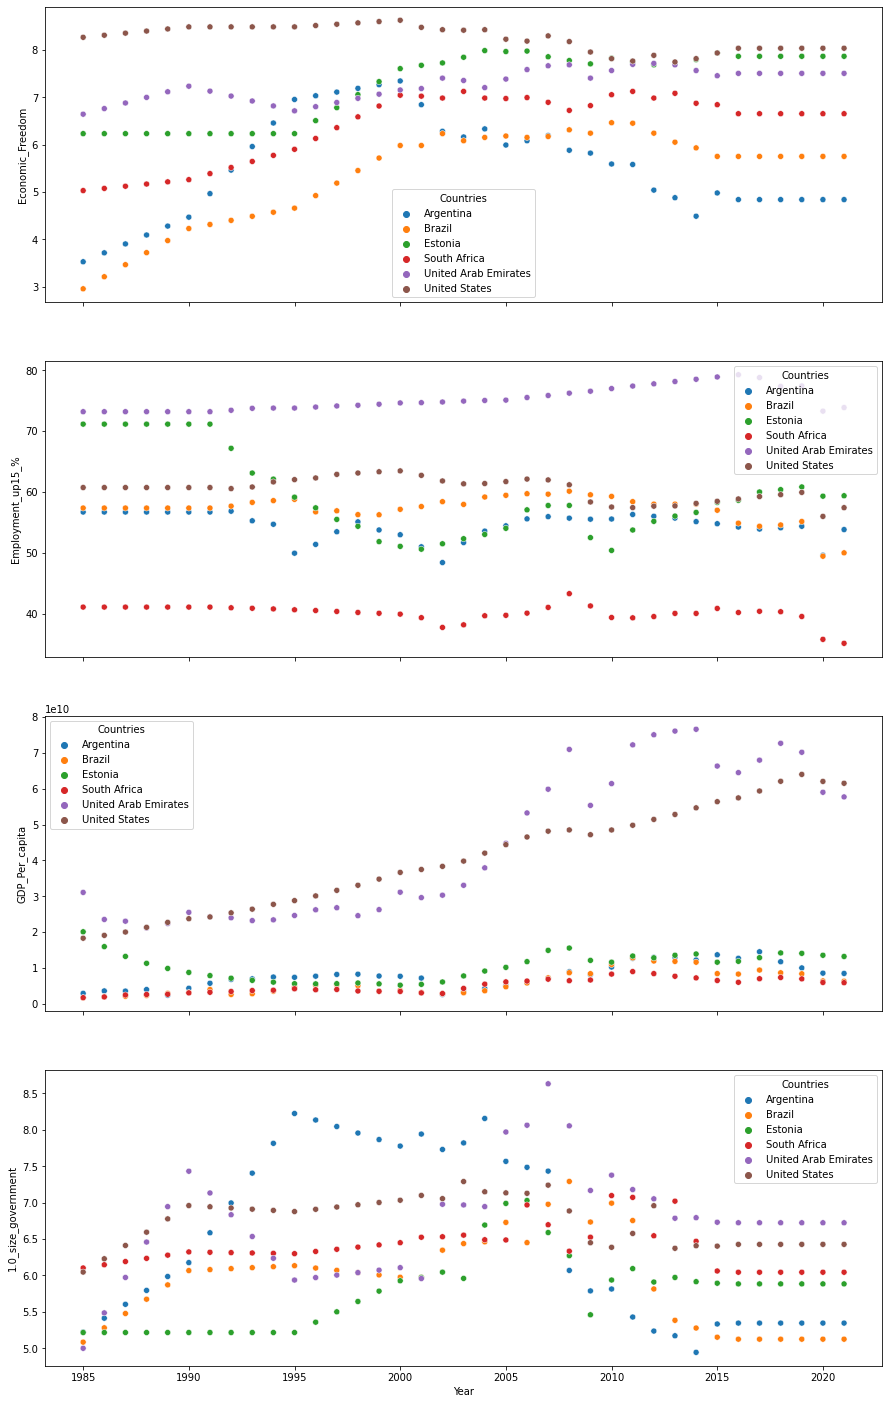

In [11]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15,25))

lista_p= ['Brazil', 'Argentina', 'Estonia', 'United States', 'United Arab Emirates', 'South Africa']

lock = DF_std.Countries.isin(lista_p)
data = DF_std[DF_std['Year'] >= 1985].loc[lock]

sns.scatterplot(ax=axes[0], data = data, x = data['Year'] , y = data['Economic_Freedom'], hue= data.Countries)
sns.scatterplot(ax=axes[1], data = data, x = data['Year'] , y = data['Employment_up15_%'], hue= data.Countries)
sns.scatterplot(ax=axes[2], data = data, x = data['Year'] , y = data['GDP_Per_capita'], hue= data.Countries)
sns.scatterplot(ax=axes[3], data = data, x = data['Year'] , y = data['1.0_size_government'], hue= data.Countries)


In [12]:
#pd.crosstab(DF_std2.Country, DF_std2.Emp_2000_2020)

# Aplicando Modelo de ML

In [13]:
# Linear Regression

feature_cols = list(DF_std2.iloc[:,1:].columns)
feature_cols.remove('Startups_Ranking_2020')
feature_cols.remove('Startups_Score_2020')

X = DF_std2[feature_cols].copy()
y = DF_std2.Startups_Score_2020

#normalizando os dados
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

SEED = 12
TS = 0.35

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TS, random_state = SEED)

model = LinearRegression(fit_intercept = True)

model.fit(X_train, y_train)

test_sklearn = np.array(X_test)
model.predict(test_sklearn)

y_pred = model.predict(X_test)

cv = ShuffleSplit(n_splits=5, test_size=TS, random_state=SEED)
CV = cross_val_score(model, X, y, cv=cv)

print('MAE:', mean_absolute_error(y_test, y_pred).round(2))
print('MSE:', mean_squared_error(y_test, y_pred).round(2))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)).round(2))
print('R2:', r2_score(y_test, y_pred).round(2))
print('Cross Validation:', CV.round(2))

MAE: 5.63
MSE: 54.7
RMSE: 7.4
R2: 0.02
Cross Validation: [ 0.02  0.27 -0.34  0.04 -0.7 ]


In [14]:
# Linear Lasso Regretion
alpha = 0.2

SEED = 12
TS = 0.35

model_l = Lasso(alpha=alpha)

model_l.fit(X_train, y_train)

ypred_lasso = model_l.predict(X_test)

#print('Coeficientes: ', model_l.coef_)

cv = ShuffleSplit(n_splits=10, test_size=TS, random_state=SEED)
CV = cross_val_score(model_l, X, y, cv=cv)

print ('MAE:', mean_absolute_error(y_test, ypred_lasso).round(2))
print ('MSE:', mean_squared_error(y_test, ypred_lasso).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, ypred_lasso)).round(2))
print ('MAPE:', mean_absolute_percentage_error(y_test, ypred_lasso).round(2))
print("R2:", r2_score(y_test, ypred_lasso).round(2))
print('Cross Validation:', CV.round(2))

MAE: 2.79
MSE: 13.71
RMSE: 3.7
MAPE: 1.97
R2: 0.75
Cross Validation: [0.75 0.84 0.83 0.62 0.71 0.73 0.69 0.08 0.85 0.06]


In [15]:
G = DF_std2[feature_cols].copy()
#X_train.columns[model_l.coef_ > 0]
G.columns[model_l.coef_  > 0]

Index(['No_billionaires', 'No_unicorns', 'Valuation_startups_US$_billions',
       'Corru_Perc_Index', '1c__1980_2020', '2.0_1980_2020', '5b__2010_2020'],
      dtype='object')

In [16]:
DF_std.columns

Index(['Year', 'Countries', 'Economic_Freedom', 'F_rank', 'Quartile',
       '1a_government_consumption', '1b_transfers', '1c_gov_enterprises',
       '1d_top_marg_tax_rate', '1.0_size_government',
       '2a_judicial_independence', '2b_impartial_courts',
       '2c_protection_property_rights', '2d_military_interference',
       '2e_integrity_legal_system', '2f_legal_enforcement_contracts',
       '2g_restrictions_sale_real_property', '2h_reliability_police',
       '2i_business_costs_crime', '2j_gender_adjustment',
       '2.0_property_rights', '3a_money_growth', '3b_std_inflation',
       '3c_inflation', '3d_freedom_own_foreign_currency', '3.0_sound_money',
       '4a_tariffs', '4b_regulatory_trade_barriers', '4c_black_market',
       '4d_control_movement_capital_ppl', '4.0_trade', '5a_credit_market_reg',
       '5b_labor_market_reg', '5c_business_reg', '5.0_regulation',
       'Suicides_No', 'Military_Expenditure_USD', 'GDP_growth',
       'Employment_up15_%', 'HDI_year', 'GDP_year'

<AxesSubplot:xlabel='Startups_Score_2020', ylabel='Density'>

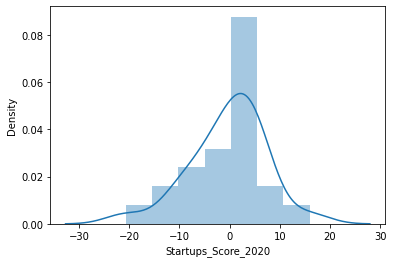

In [17]:
#ytest = ytest.astype(float)
sns.distplot(y_test - y_pred)

In [18]:
#ypred2 = model.predict(X)
#model.coef_

(<Figure size 1080x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Comparação de Valores'}, xlabel='Country Index', ylabel='Startups_Score_2020'>)

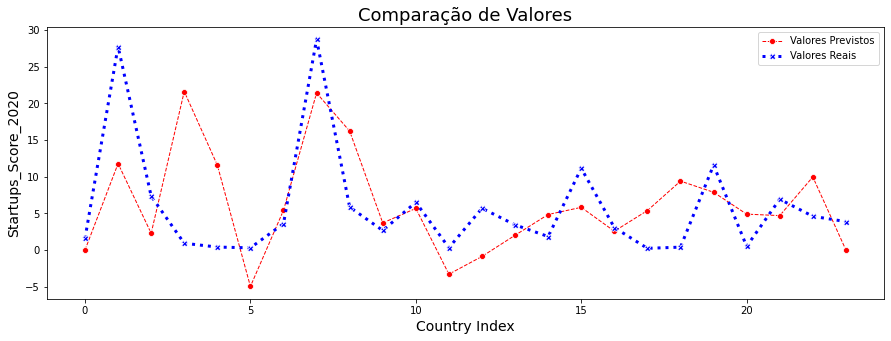

In [19]:
ax = plt.subplots(figsize=(15,5))

sns.lineplot(x=range(len(y_pred)), y=y_pred,
             label="Valores Previstos",
             color='red', marker='o',
             linestyle='--', linewidth=1)

sns.lineplot(x=range(len(y_pred)),y=y_test,
             label="Valores Reais",
             color='blue', marker='X',
             linestyle=':', linewidth=3)

plt.legend(loc="best")
plt.title('Comparação de Valores', fontsize=18)
plt.xlabel('Country Index', fontsize=14)
plt.ylabel('Startups_Score_2020', fontsize=14)
plt.xticks(rotation=0)
ax

In [20]:
#heatmap pós limpeza dos outliers
#plt.figure(figsize=(15,10))
#sns.heatmap(DF_std2.corr(), annot = True, cmap ='Blues')

<AxesSubplot:xlabel='Country', ylabel='Emp_2010_2020'>

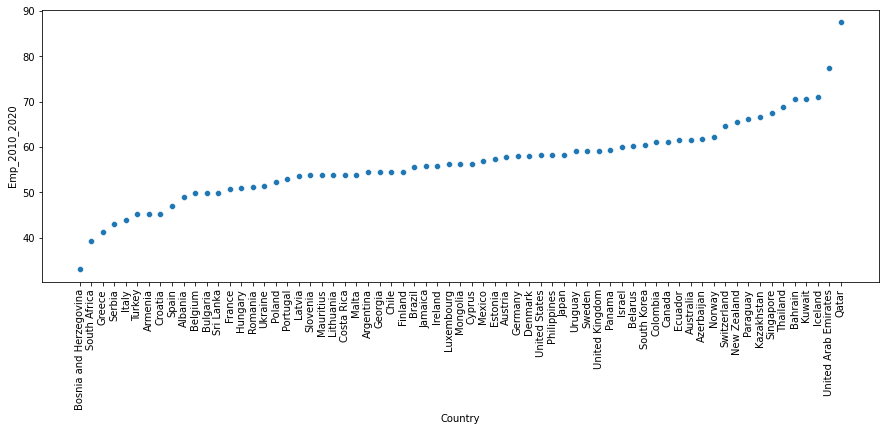

In [21]:
# Gráfico de Ranking

topic = 'Emp_2010_2020'

data = DF_std2.sort_values(by = topic).reset_index(drop=True)

ax = sns.scatterplot(data = data , x = data.Country , y = data[topic])
ax.figure.set_size_inches(15, 5)
plt.xticks(rotation=90)

ax

<AxesSubplot:xlabel='Country', ylabel='Eco_1980_2020'>

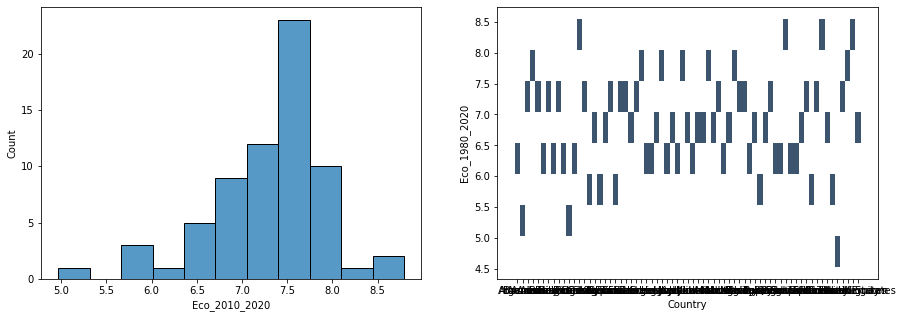

In [22]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,5))

sns.histplot(ax=axes[0], data = DF_std2.Eco_2010_2020)

sns.histplot(ax=axes[1], data = DF_std2,  
             x = 'Country',
             y = 'Eco_1980_2020')

In [23]:
#DF_std2.dtypes.loc[DF_std2.dtypes == object]
DF_std2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Columns: 132 entries, Country to Pop_2010_2020
dtypes: float64(130), int64(1), object(1)
memory usage: 69.2+ KB


In [24]:
DF_std2.columns

Index(['Country', 'No_billionaires', 'Networth', 'No_unicorns',
       'Valuation_startups_US$_billions', 'Happy_rank', 'Happy_score',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices',
       ...
       'GDP_2010_2020', 'Emp_1980_2020', 'Emp_2000_2020', 'Emp_2010_2020',
       'HDI_1980_2020', 'HDI_2000_2020', 'HDI_2010_2020', 'Pop_1980_2020',
       'Pop_2000_2020', 'Pop_2010_2020'],
      dtype='object', length=132)

# KMeans

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

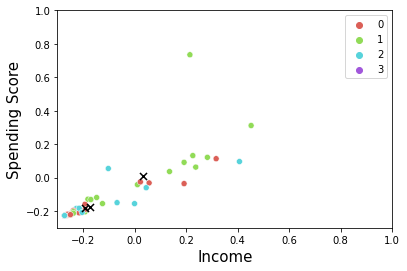

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = DF_std2.iloc[:,1:]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters = 4,
                n_init = 10,
                random_state = 0
               ) # Número de repetições = 10

kmeans.fit(X_scaled)

labels = kmeans.labels_ # Rótulos que indicam a qual cluster os dados pertencem
centroids = kmeans.cluster_centers_ # Coordenadas dos centróides

sns.scatterplot(x = X_scaled[ : , 0],
                y = X_scaled[ : , 1],
                hue = labels, 
                legend = 'full',
                palette = sns.color_palette("hls", 4)
               );


plt.xlabel('Income', fontsize = 15); 
plt.ylabel('Spending Score', fontsize = 15);

plt.scatter(centroids[ : , 0], 
            centroids[ : , 1], 
            marker = 'x', 
            s = 50, 
            color = 'k'
           );

plt.ylim((-0.3,1))
plt.xlim((-0.3,1))
plt.figure

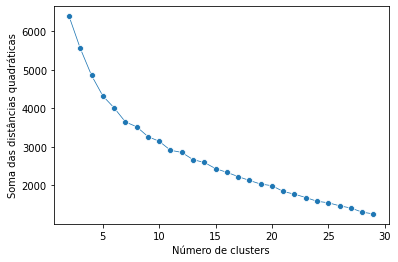

In [26]:
sq_distances = []
k_values = range(2,30);

for k in k_values:
    kmeans = KMeans(n_clusters = k, 
                    n_init = 10, 
                    random_state = 0
                   )
    kmeans.fit(X_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x = k_values, 
             y = sq_distances, 
             marker = 'o', 
             size = 30, 
             legend = False
            );
plt.ylabel('Soma das distâncias quadráticas');
plt.xlabel('Número de clusters');    

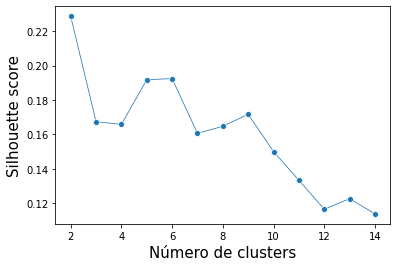

In [27]:
from sklearn.metrics import silhouette_score, silhouette_samples

sil = []
k_values = range(2,15);

for k in k_values:
    kmeans = KMeans(n_clusters = k, 
                    n_init = 10, 
                    random_state = 0
                   ) 
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, 
                             kmeans.labels_
                            )
    sil.append(score)

sns.lineplot(x = k_values,
             y = sil, 
             marker = 'o', 
             size = 30,
             legend = False
            );
plt.ylabel('Silhouette score', fontsize = 15);
plt.xlabel('Número de clusters',fontsize = 15);

# Decision Tree

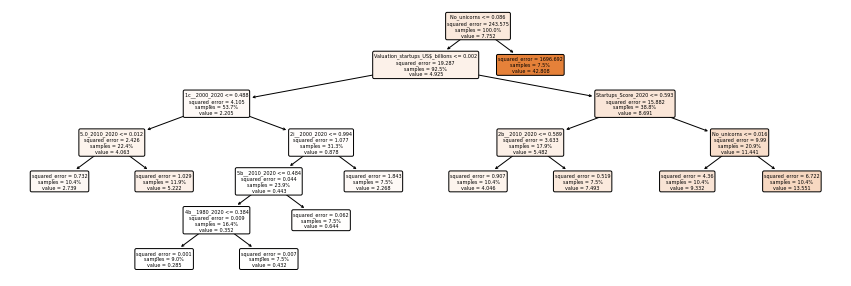

In [39]:
from sklearn import tree


feature_cols = list(DF_std2.iloc[:,1:].columns)
feature_cols.remove('Startups_Ranking_2020')
feature_cols.remove('Startups_Score_2020')

X = DF_std2[feature_cols].copy()
y = DF_std2.Startups_Score_2020

#normalizando os dados
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Fit regression model
regr = tree.DecisionTreeRegressor(criterion='squared_error',
                                  splitter='best',
                                  max_depth=None,
                                  min_samples_split=2,
                                  min_samples_leaf=5,
                                  min_weight_fraction_leaf=0.0,
                                  max_features=None,
                                  random_state=None,
                                  max_leaf_nodes=None,
                                  )
regr.fit(X, y)

fig = plt.figure(figsize=(15,5))
_ = tree.plot_tree(regr,feature_names=DF_std2.iloc[:,1:].columns,filled=True,rounded=True, proportion=True)

plt.show()

In [40]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_2 <= 0.09
|   |--- feature_3 <= 0.00
|   |   |--- feature_30 <= 0.49
|   |   |   |--- feature_112 <= 0.01
|   |   |   |   |--- value: [2.74]
|   |   |   |--- feature_112 >  0.01
|   |   |   |   |--- value: [5.22]
|   |   |--- feature_30 >  0.49
|   |   |   |--- feature_63 <= 0.99
|   |   |   |   |--- feature_106 <= 0.48
|   |   |   |   |   |--- feature_89 <= 0.38
|   |   |   |   |   |   |--- value: [0.28]
|   |   |   |   |   |--- feature_89 >  0.38
|   |   |   |   |   |   |--- value: [0.43]
|   |   |   |   |--- feature_106 >  0.48
|   |   |   |   |   |--- value: [0.64]
|   |   |   |--- feature_63 >  0.99
|   |   |   |   |--- value: [2.27]
|   |--- feature_3 >  0.00
|   |   |--- feature_13 <= 0.59
|   |   |   |--- feature_43 <= 0.59
|   |   |   |   |--- value: [4.05]
|   |   |   |--- feature_43 >  0.59
|   |   |   |   |--- value: [7.49]
|   |   |--- feature_13 >  0.59
|   |   |   |--- feature_2 <= 0.02
|   |   |   |   |--- value: [9.33]
|   |   |   |--- feature_2 >  0.02
| 